In [1]:
# loop through all the files in ouptut directory and create dataframes for them
import pandas as pd
import os

# get the current working directory
cwd = "../" + os.getcwd()
# get the output directory
output_dir = os.path.join(cwd, 'output')
# get the list of files in the output directory
files = os.listdir(output_dir)

dfs = {}

# loop through the files and create dataframes
for file in files:
    # get the file path
    file_path = os.path.join(output_dir, file)
    # read the file
    df = pd.read_csv(file_path)
    # append the dataframe to the list
    dfs[file] = df

    # print the first 5 rows of the dataframe
    print(df.head())
    print('\n\n')

   bus_id            timestamp      load stop  time_on_route  time_waiting  \
0    4895  2024-10-31 14:24:00  0.179104  NaN              0             0   
1    4895  2024-10-31 14:24:31  0.179104  NaN            885             0   
2    4895  2024-10-31 14:25:01  0.179104  NaN            855             0   
3    4895  2024-10-31 14:25:32  0.179104  NaN            824             0   
4    4895  2024-10-31 14:26:02  0.179104  NaN            794             0   

   time_to_complete  
0                 0  
1               122  
2                92  
3                61  
4                31  



   bus_id            timestamp      load                  stop  time_on_route  \
0   13216  2024-10-31 14:24:00  0.000000                   NaN              0   
1   13216  2024-10-31 14:24:31  0.000000                   NaN            885   
2   13216  2024-10-31 14:25:01  0.000000                   NaN            855   
3   13216  2024-10-31 14:25:32  0.044776  Busch Student Center          

In [6]:
loop_times = {}

for key in dfs:
    loop_times[key] = []

    # loop through the dataframe and get the values when time_on_route changes from 0 to something else
    for i in range(1, len(dfs[key])):
        if dfs[key].loc[i]['time_on_route'] != 0 and dfs[key].loc[i - 1]['time_on_route'] == 0 and dfs[key].iloc[i]['bus_id'] == dfs[key].iloc[i - 1]['bus_id']:
            loop_times[key].append(dfs[key].loc[i]['time_on_route'])

print(loop_times)

{'A_Route_stop.csv': [885, 2047, 2540, 2237, 2025, 2516, 1874, 2092, 985, 1112, 1483, 1546, 1516, 1486, 1518, 1610, 1582, 1552, 2521, 1648, 1714, 1713, 1995, 1966, 2185, 2780, 2032, 1908, 3475, 2127, 2285, 2505, 1598, 31, 314, 1361, 1646, 2028, 3238, 2034, 2002, 1654, 2230, 2103, 1915, 1982, 2206, 1988, 2275, 2247, 3169, 2954, 3053, 2380, 2156, 1995, 1771, 1896, 2296, 1809, 2486, 1566, 2275, 2123, 1570, 2310, 1071, 1741, 1410, 1342, 1543, 1617, 1347, 1349, 2192, 1485, 1826, 1997, 1556, 1930, 2270, 2002, 883, 1100, 1080, 1420, 1485, 1485, 1455, 1549, 1579, 1427, 1645, 2145, 1587, 1556, 1714, 1744, 2151, 2091, 2185, 1936, 1844, 1750, 2411, 2034, 2097, 2631, 2067, 1233, 1423, 1457, 1521, 1460, 1492, 2035, 1462, 1401, 1753, 1785, 1403, 1631, 2429, 1184, 1539, 2083, 1764, 1506, 1855, 2216, 1734, 2444, 1803, 1931, 1867, 1325, 1461, 1522, 1520, 1425, 1556, 1757, 1429, 1303, 1596, 1890, 1564, 1602, 1736, 1344, 1637, 1965, 2387, 2289, 2514, 1766, 1798, 1994, 1900, 1635, 1570, 1102, 1505, 1472, 

In [23]:
# except for the c route remove all the values that are less than 10
for key in loop_times:
    if not 'C' in key:
        loop_times[key] = [x for x in loop_times[key] if x >= 600]

C:\Users\akash\AppData\Local\Temp\ipykernel_1944\2402374105.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='route', y='time', data=df, palette='Set2')


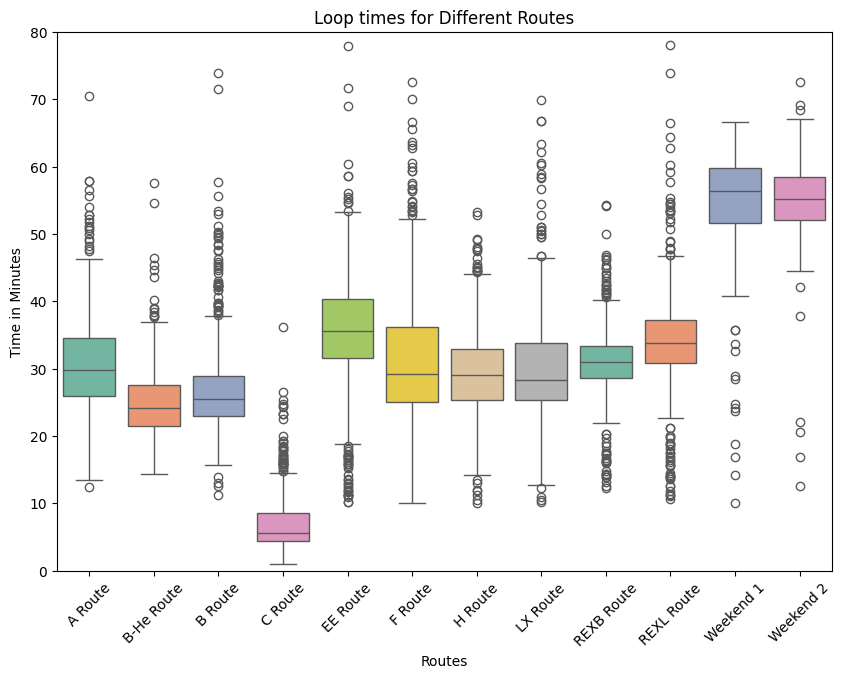

In [24]:
# make box plots with the loop times for different routes in one grpah
import matplotlib.pyplot as plt
import seaborn as sns

# create a list of dataframes
dfs_list = []
for key in loop_times:
    df = pd.DataFrame(loop_times[key], columns=['time'])
    df['route'] = key.split('.')[0].replace('_', ' ').replace(' stop', '')
    df['time'] = df['time'] / 60
    dfs_list.append(df)

# concatenate the dataframes
df = pd.concat(dfs_list)

# create a box plot
plt.figure(figsize=(10, 7))
sns.boxplot(x='route', y='time', data=df, palette='Set2')
# rotate the x labels
plt.xticks(rotation=45)
plt.title('Loop times for Different Routes')
plt.xlabel('Routes')
plt.ylabel('Time in Minutes')
plt.ylim(0, 80)
plt.show()